
# Optional 1: Physics
---
- If you want to (and have time for) a more complete modelling of a beamline, explore the following exercises to extend the capabilities of our simple toolbox. 
- **Note 1:** A basic knowledge of Python and some programming experience is required!
- **Note 2:** We suggest to extend your library by filling the gaps of [tracking_library_advanced.py](./tracking_library_advanced.py) after having tested your functions inside the notebook...
---

#### Setup of your Python kernel
Let's load the basic library functions, and setup matplotlib for nice inline plots

In [3]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### Exercise 1.1Ph

1. Extend the library toolbox by implementing a **thick quadrupole** element (call it `Qthick`), to be build as a function of its normalised strength $K1$ and length $L$.
2. Build again a simple beamline made by a **thick** quadrupole of **20 cm length** of focal length $f = 2$ m followed by a drift of length $L=f=2$ m. Track again a few particles with zero angles and different offsets. Do all particles still end with $x=0$?

- **Hint:** Remember that the relationship between focal length $f$ and integrated quadrupoles strenght $K1 L$ is:

\begin{equation}
f = \frac{1}{K1 \times L}
\end{equation}

- **Python Hint:**: develop/copy your `Qthick` element into `tracking_library_advanced.py` so to have it available for later


#### SOLUTION

Text(0, 0.5, 'Final x_1 [mm]')

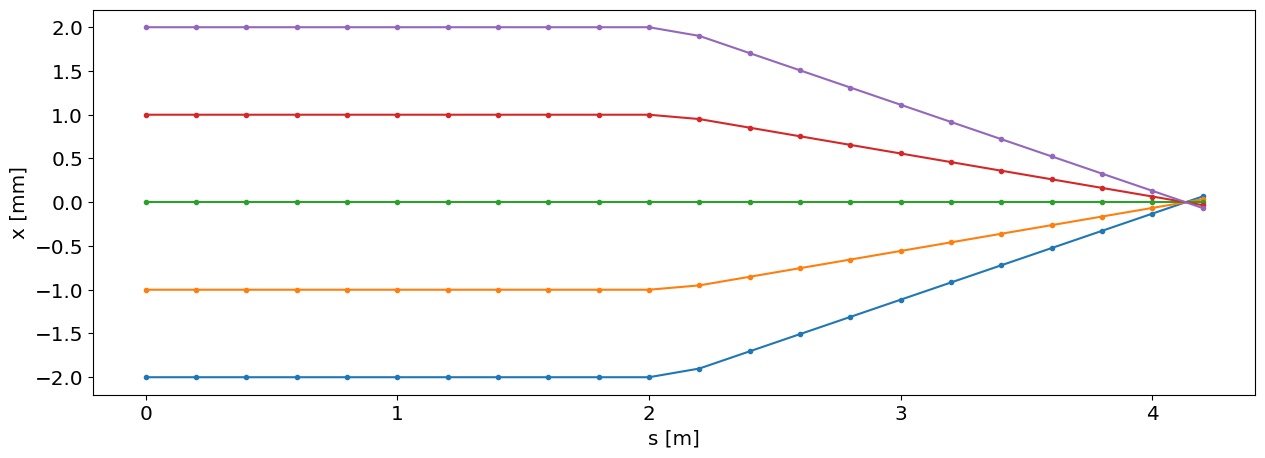

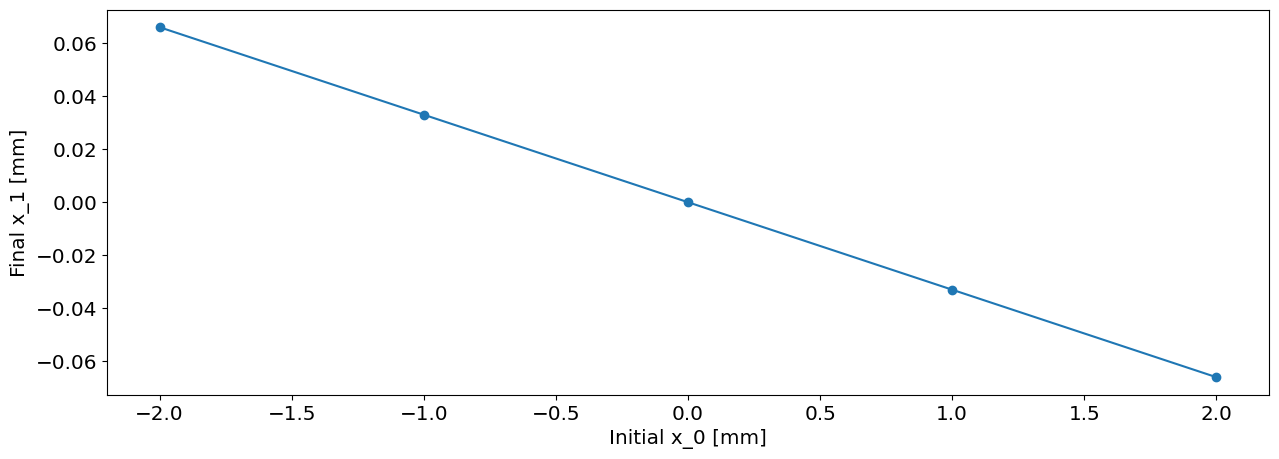

In [2]:
from tracking_library_advanced_solution import Qthick

# Particles definition:
X_0 = np.array([[-2,-1,0,1,2], [0,0,0,0,0]])

# Beamline definition:
f = 2 # [m]
Lq = 0.2 # [m]
K1 = 1/(f*Lq)
beamline = 10*D(f/10) + Qthick(K1, Lq) + 10*D(f/10)

# tracking
tracked_data = transportParticles(X_0, beamline)

# plotting as a function of s along the beamline
plt.figure()
plt.plot(tracked_data['s'], tracked_data['x'], '.-')
plt.xlabel('s [m]')
plt.ylabel('x [mm]')

# plotting of final x coordinate as a function of initial one
plt.figure()
plt.plot(tracked_data['x'][0,:], tracked_data['x'][-1,:], 'o-')
plt.xlabel('Initial x_0 [mm]')
plt.ylabel('Final x_1 [mm]')


- **Note:** The final $x$ coordinate is not 0 anymore! The focal length is `exact` only in the limit of thin lens approximation, otherwise the thickness of the quadrupole itself has to be taken into account!